In [2]:
import pandas as pd

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
beers =pd.read_csv("beers.csv", index_col=0)

In [7]:
beers.head()

,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


In [34]:
beers.info

<bound method DataFrame.info of         abv   ibu    id                  name                           style  \
0     0.050   NaN  1436              Pub Beer             American Pale Lager   
1     0.066   NaN  2265           Devil's Cup         American Pale Ale (APA)   
2     0.071   NaN  2264   Rise of the Phoenix                    American IPA   
3     0.090   NaN  2263              Sinister  American Double / Imperial IPA   
4     0.075   NaN  2262         Sex and Candy                    American IPA   
...     ...   ...   ...                   ...                             ...   
2405  0.067  45.0   928             Belgorado                     Belgian IPA   
2406  0.052   NaN   807         Rail Yard Ale        American Amber / Red Ale   
2407  0.055   NaN   620       B3K Black Lager                     Schwarzbier   
2408  0.055  40.0   145   Silverback Pale Ale         American Pale Ale (APA)   
2409  0.052   NaN    84  Rail Yard Ale (2009)        American Amber / Red Ale

In [40]:
#data cleaning
beers.isna().sum()

abv             62
ibu           1005
id               0
name             0
style            5
brewery_id       0
ounces           0
dtype: int64

In [41]:
#drop ibu column

beers_clean = beers.drop(columns=["ibu"])

beers_clean.head()

,abv,id,name,style,brewery_id,ounces
0,0.050,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.090,2263,Sinister,American Double / Imperial IPA,177,12.0
4,0.075,2262,Sex and Candy,American IPA,177,12.0


In [42]:
#fill empty cells
beers_clean = beers_clean.fillna(method="ffill")
beers_clean.head()

,abv,id,name,style,brewery_id,ounces
0,0.050,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.090,2263,Sinister,American Double / Imperial IPA,177,12.0
4,0.075,2262,Sex and Candy,American IPA,177,12.0


In [43]:
beers_clean.isna().sum()

abv           0
id            0
name          0
style         0
brewery_id    0
ounces        0
dtype: int64

In [44]:
#indexing
beers_ind = beers_clean.set_index("name")
beers_ind

,abv,id,style,brewery_id,ounces
name,,,,,
Pub Beer,0.050,1436,American Pale Lager,408,12.0
Devil's Cup,0.066,2265,American Pale Ale (APA),177,12.0
Rise of the Phoenix,0.071,2264,American IPA,177,12.0
Sinister,0.090,2263,American Double / Imperial IPA,177,12.0
Sex and Candy,0.075,2262,American IPA,177,12.0
...,...,...,...,...,...
Belgorado,0.067,928,Belgian IPA,424,12.0
Rail Yard Ale,0.052,807,American Amber / Red Ale,424,12.0
B3K Black Lager,0.055,620,Schwarzbier,424,12.0


In [45]:
brew = pd.read_csv("breweries.csv", index_col=0)

In [46]:
brew.head()

,name,city,state
0,NorthGate Brewing,Minneapolis,MN
1,Against the Grain Brewery,Louisville,KY
2,Jack's Abby Craft Lagers,Framingham,MA
3,Mike Hess Brewing Company,San Diego,CA
4,Fort Point Beer Company,San Francisco,CA


In [47]:
brew.isna().sum()

name     0
city     0
state    0
dtype: int64

In [48]:
brew.info

<bound method DataFrame.info of                               name           city state
0               NorthGate Brewing     Minneapolis    MN
1        Against the Grain Brewery     Louisville    KY
2         Jack's Abby Craft Lagers     Framingham    MA
3        Mike Hess Brewing Company      San Diego    CA
4          Fort Point Beer Company  San Francisco    CA
..                             ...            ...   ...
553            Covington Brewhouse      Covington    LA
554                Dave's Brewfarm         Wilson    WI
555          Ukiah Brewing Company          Ukiah    CA
556        Butternuts Beer and Ale  Garrattsville    NY
557  Sleeping Lady Brewing Company      Anchorage    AK

[558 rows x 3 columns]>

In [49]:
brewery = brew.rename(columns={"name": "brewery", "city": "brewery city", "state":"brewery state"})

In [50]:
#Merge Tables
brewery.index.name = 'brewery_id'
all_beers = beers_clean.merge(brewery, on="brewery_id", how="left")
all_beers

,abv,id,name,style,brewery_id,ounces,brewery,brewery city,brewery state
0,0.050,1436,Pub Beer,American Pale Lager,408,12.0,10 Barrel Brewing Company,Bend,OR
1,0.066,2265,Devil's Cup,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN
2,0.071,2264,Rise of the Phoenix,American IPA,177,12.0,18th Street Brewery,Gary,IN
3,0.090,2263,Sinister,American Double / Imperial IPA,177,12.0,18th Street Brewery,Gary,IN
4,0.075,2262,Sex and Candy,American IPA,177,12.0,18th Street Brewery,Gary,IN
...,...,...,...,...,...,...,...,...,...
2405,0.067,928,Belgorado,Belgian IPA,424,12.0,Wynkoop Brewing Company,Denver,CO
2406,0.052,807,Rail Yard Ale,American Amber / Red Ale,424,12.0,Wynkoop Brewing Company,Denver,CO
2407,0.055,620,B3K Black Lager,Schwarzbier,424,12.0,Wynkoop Brewing Company,Denver,CO
2408,0.055,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0,Wynkoop Brewing Company,Denver,CO


In [39]:
all_beers.groupby('brewery')
all_beers

,abv,id,style,brewery_id,ounces,brewery,brewery city,brewery state
0,0.050,1436,American Pale Lager,408,12.0,10 Barrel Brewing Company,Bend,OR
1,0.066,2265,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN
2,0.071,2264,American IPA,177,12.0,18th Street Brewery,Gary,IN
3,0.090,2263,American Double / Imperial IPA,177,12.0,18th Street Brewery,Gary,IN
4,0.075,2262,American IPA,177,12.0,18th Street Brewery,Gary,IN
...,...,...,...,...,...,...,...,...
2405,0.067,928,Belgian IPA,424,12.0,Wynkoop Brewing Company,Denver,CO
2406,0.052,807,American Amber / Red Ale,424,12.0,Wynkoop Brewing Company,Denver,CO
2407,0.055,620,Schwarzbier,424,12.0,Wynkoop Brewing Company,Denver,CO
2408,0.055,145,American Pale Ale (APA),424,12.0,Wynkoop Brewing Company,Denver,CO


In [59]:
gr = all_beers.groupby(["brewery", "style"])["name"].count()
gr

brewery                    style                         
10 Barrel Brewing Company  American Pale Lager               1
18th Street Brewery        American Double / Imperial IPA    2
                           American IPA                      2
                           American Pale Ale (APA)           4
                           American Porter                   1
                                                            ..
Wynkoop Brewing Company    American Strong Ale               1
                           Belgian IPA                       1
                           Chile Beer                        1
                           Pumpkin Ale                       1
                           Schwarzbier                       1
Name: name, Length: 1903, dtype: int64

In [68]:
styles = all_beers["style"].value_counts()

/Users/filipa_zambujal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


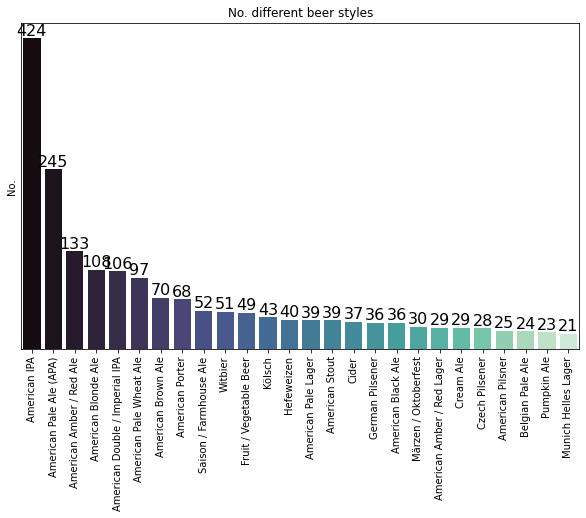

In [71]:
top_styles = styles[styles > 20]

plt.figure(figsize=(10,6))
plt.title('No. different beer styles')
g=sns.barplot(top_styles.index, top_styles, palette='mako')
g.bar_label(g.containers[0], fmt='%.0f', fontsize=16)
plt.xticks(rotation=90)
plt.yticks([])
plt.ylabel('No. Beers')
plt.show()